<a href="https://colab.research.google.com/github/akr1139/Fresh_Or_Rotten_fruits_using_CNN/blob/master/new_code_(11_06_finalised)Fresh_or_rotten_fruits_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##code to prevent colab from disconecting !!!


---



In [1]:
#Use only when the training takes long time
"""

function ConnectButton(){
    console.log("Connect pushed");
    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click()
}
setInterval(ConnectButton,60000);


Set a javascript interval to click on the connect button every 60 seconds.
Open developer-settings (in your web-browser) with Ctrl+Shift+I then click on console tab and type this on
the console prompt. (for mac press Option+Command+I)
                                                           -Stack overflow
"""


'\n\nfunction ConnectButton(){\n    console.log("Connect pushed"); \n    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click() \n}\nsetInterval(ConnectButton,60000);\n\n\nSet a javascript interval to click on the connect button every 60 seconds.\nOpen developer-settings (in your web-browser) with Ctrl+Shift+I then click on console tab and type this on \nthe console prompt. (for mac press Option+Command+I)\n                                                           -Stack overflow\n'

## Downgrading tensorflow version from 2.3.0 to 2.2.0
*  If your pc has 2.3.0 version install then skip  !!!
##* Note:-Its important so that the save model is compatible while deploying/testing on different machine! Colab uses a higher Version tensorflow which is not available till now for download
                                        6-September-2020

In [3]:
import tensorflow as tf

In [4]:
tf.__version__

'2.12.0'

In [7]:
!pip install tensorflow==2.2.0

ERROR: Could not find a version that satisfies the requirement tensorflow==2.2.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.15.0rc0, 2.15.0rc1)
ERROR: No matching distribution found for tensorflow==2.2.0


In [6]:
import tensorflow as tf
tf.__version__

'2.12.0'

## Instaling kiggle and downloading data set directly from kiggle via colab
 #skip to importing libraries if you already have a dataset or working with jupyter/spyder ide


In [8]:
! pip install -q kaggle

After runing the first cell(! pip install -q kaggle) !
Download the kaggle.json file from the kaggle website
* Steps
1. Create a account at kaggle
2. go to --- My Account-----Scroll down-- you will     find  a option ----create a new api--click
3. jsone file will be downloaded file

In [9]:
from google.colab import files
files.upload()#upload from pc to colab and copy the path
#upload your json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akr1139","key":"01de108757b4b7b6d1c75e6fdb135f66"}'}

* making directoy and copying the json file to it

In [10]:
!mkdir ~/.kaggle #make directory
!cp kaggle.json ~/.kaggle #copy to the directory

In [11]:
 ! chmod 600 ~/.kaggle/kaggle.json #changing the permission

Downloading the data set

In [12]:
  ! kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

100% 3.57G/3.58G [00:33<00:00, 70.2MB/s]
100% 3.58G/3.58G [00:33<00:00, 116MB/s] 


Unziping the data set

In [13]:
!unzip  fruits-fresh-and-rotten-for-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.09 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.18 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.24 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.37 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.51 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.02 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.12 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.21 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.31 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07

## **Fresh_or_rotten_fruit_clasiffication**
 #importing libraries

In [14]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
tf.__version__

'2.12.0'

Arranging the images #reshaping the flow

In [15]:
#First we need to create the Image Augmantation
traning_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip='True')
test_datagen=ImageDataGenerator(rescale=1./255)

 * Importing the data set
 * and spliting into training and test

In [16]:
#creating the test & train sets
traning_set=traning_datagen.flow_from_directory('/content/dataset/train',batch_size=60,target_size=(64,64),class_mode='categorical')
test_set=test_datagen.flow_from_directory('/content/dataset/test',batch_size=60,target_size=(64,64),class_mode='categorical')

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


* Building the convolution model

In [17]:
model=tf.keras.Sequential()
#first layer
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=[64,64,3],activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
#second
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
#flatten
model.add(tf.keras.layers.Flatten())
#adding the nural net
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=1024,activation='relu'))
model.add(tf.keras.layers.Dense(units=521,activation='relu'))
model.add(tf.keras.layers.Dense(units=6,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                    

In [18]:
#compling
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x=traning_set,validation_data=test_set,epochs=10)


Epoch 1/10
182/182 [==============================] - 351s 2s/step - loss: 0.2465 - accuracy: 0.6686 - val_loss: 0.1245 - val_accuracy: 0.8584
Epoch 2/10
182/182 [==============================] - 352s 2s/step - loss: 0.1158 - accuracy: 0.8629 - val_loss: 0.1070 - val_accuracy: 0.8751
Epoch 3/10
182/182 [==============================] - 361s 2s/step - loss: 0.0876 - accuracy: 0.8969 - val_loss: 0.0667 - val_accuracy: 0.9329
Epoch 4/10
182/182 [==============================] - 336s 2s/step - loss: 0.0743 - accuracy: 0.9158 - val_loss: 0.0649 - val_accuracy: 0.9274
Epoch 5/10
182/182 [==============================] - 333s 2s/step - loss: 0.0601 - accuracy: 0.9319 - val_loss: 0.0394 - val_accuracy: 0.9607
Epoch 6/10
182/182 [==============================] - 352s 2s/step - loss: 0.0478 - accuracy: 0.9491 - val_loss: 0.0384 - val_accuracy: 0.9559
Epoch 7/10
182/182 [==============================] - 349s 2s/step - loss: 0.0438 - accuracy: 0.9505 - val_loss: 0.0354 - val_accuracy: 0.9622

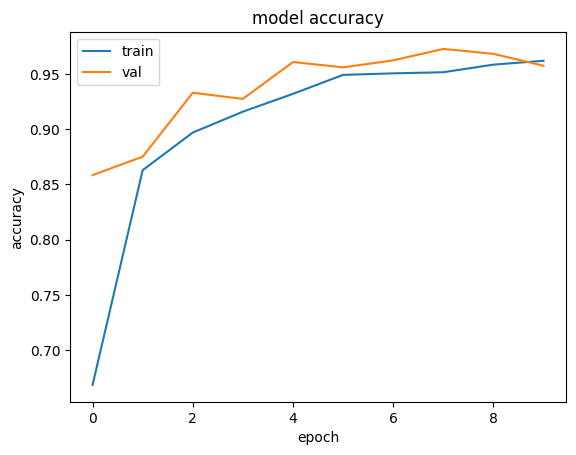

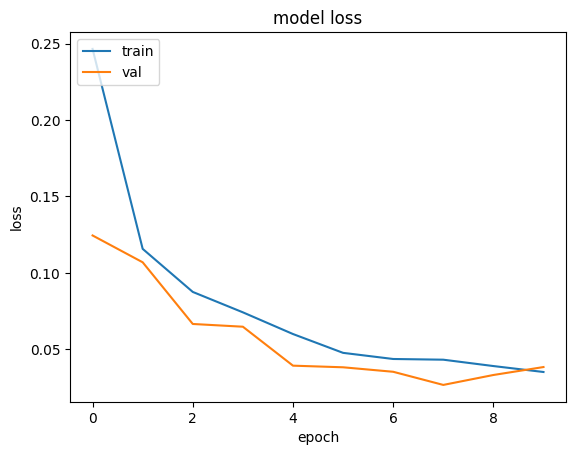

In [19]:
#ploting the accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
#ploting the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [20]:
#save your model and download it or add drive path
model.save('Fresh_Rotten_fruis.h5')#saving the weights of nural network
model_json = model.to_json()       #Saving in json form
with open("Fresh_Rotten_Fruits.json", "w") as json_file:
    json_file.write(model_json)
print('Saved')

Saved


In [25]:
!pip install Pillow

In [28]:
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
# from keras.preprocessing.image import img_to_array
from PIL import Image


In [29]:
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
# from keras.preprocessing.image import img_to_array
from PIL import Image

classes = ['Fresh Apple', 'Fresh Banana', 'Fresh Orange', 'Rotten Apple', 'Rotten Banana', 'Rotten Orange']

# Load the image using PIL (Python Imaging Library)
image_path = '/content/images.jpg'
img = Image.open(image_path)
img = img.resize((64, 64))  # Resize the image to the target size
img_array = img_to_array(img)  # Convert image to NumPy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Now you can proceed with the rest of your code for prediction
result = model.predict(img_array)
print(np.argmax(result))
result1 = result[0]
for i in range(6):
    if result1[i] == 1.:
        break
prediction = classes[i]
print(prediction)


1/1 [==============================] - 0s 403ms/step
3
Rotten Apple


##* Suggestion
##If you are working on multiple classes(more then 20)  then use this syntax



In [31]:
#Saving in array #bypass
import numpy as np
labels=traning_datagen.flow_from_directory('/content/dataset/train')
Demo_labels=labels.class_indices
print(Demo_labels)
print("Dict data is converted to array")
#converting dict to array
data = list(dict. items(Demo_labels))
an_array = np. array(data)
print(an_array)
np.save('Fruits_labels',an_array)
#saving in array form

Found 10901 images belonging to 6 classes.
{'freshapples': 0, 'freshbanana': 1, 'freshoranges': 2, 'rottenapples': 3, 'rottenbanana': 4, 'rottenoranges': 5}
Dict data is converted to array
[['freshapples' '0']
 ['freshbanana' '1']
 ['freshoranges' '2']
 ['rottenapples' '3']
 ['rottenbanana' '4']
 ['rottenoranges' '5']]


In [37]:
from PIL import Image
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array


# Load the pre-defined class labels from the array
label_data = np.load('/content/Fruits_labels.npy')

# Load and preprocess the image using PIL (Python Imaging Library)
image_path = '/content/images.jpg'
img = Image.open(image_path)
img = img.resize((64, 64))  # Resize the image to the target size
test_image = img_to_array(img)
test_image = np.expand_dims(test_image, axis=0)

# Make predictions using the model
result = model.predict(test_image)
result1 = result[0]

# Find the predicted class index
predicted_class_index = np.argmax(result1)

# Get the predicted class label from the loaded labels array
prediction = label_data[predicted_class_index][0]

print(prediction)


1/1 [==============================] - 0s 62ms/step
rottenapples
